Initialisation de l'analyse du dataset de fleurs...

Structure du dataset :

Exploration de /Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data:
Data/
  .DS_Store
  train/
    .DS_Store
    calendula/
      28851355744_fcb4f95e74_c.jpg
      48484842896_c9bb405ae4_c.jpg
      4649784168_f3c2da8dc7_c.jpg
    bellflower/
      7571141200_8c6863db5b_c.jpg
      48011787111_34208c1ca6_c.jpg
      49998772403_3cef2da323_c.jpg
    iris/
      5662189283_4dcfe39c51_c.jpg
      4637492320_781a809560_c.jpg
      14182403531_4a96c3ab1e_c.jpg
    astilbe/
      121833397_0139a4bf24_c.jpg
      3742440667_64273e0171_c.jpg
      1052212431_4963309d03_c.jpg
    common_daisy/
      14317879278_de54cd133a_c.jpg
      26664249162_f6d12e6130_c.jpg
      7073808141_5475af06d1_c.jpg
    california_poppy/
      2342305454_784034521e_c.jpg
      50489962867_d7903320fe_c.jpg
      2090830922_030cc530c1_c.jpg
    carnation/
      2489260520_205d51d62a_c.jpg
      3468814178

2025-03-06 09:22:19.488867: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-03-06 09:22:19.488915: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-03-06 09:22:19.488927: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-03-06 09:22:19.489127: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 09:22:19.489140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



Distribution des images :

Données d'entraînement :
- astilbe: 726 images
- bellflower: 872 images
- black_eyed_susan: 986 images
- calendula: 1011 images
- california_poppy: 1021 images
- carnation: 924 images
- common_daisy: 978 images
- coreopsis: 1035 images
- dandelion: 1038 images
- iris: 1041 images
- rose: 986 images
- sunflower: 1013 images
- tulip: 1034 images
- water_lily: 977 images

Données de validation :
- astilbe: 7 images
- bellflower: 7 images
- black_eyed_susan: 7 images
- calendula: 7 images
- california_poppy: 7 images
- carnation: 7 images
- common_daisy: 7 images
- coreopsis: 7 images
- dandelion: 7 images
- iris: 7 images
- rose: 7 images
- sunflower: 7 images
- tulip: 7 images
- water_lily: 7 images

Visualisation d'échantillons d'images...


2025-03-06 09:22:19.948448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


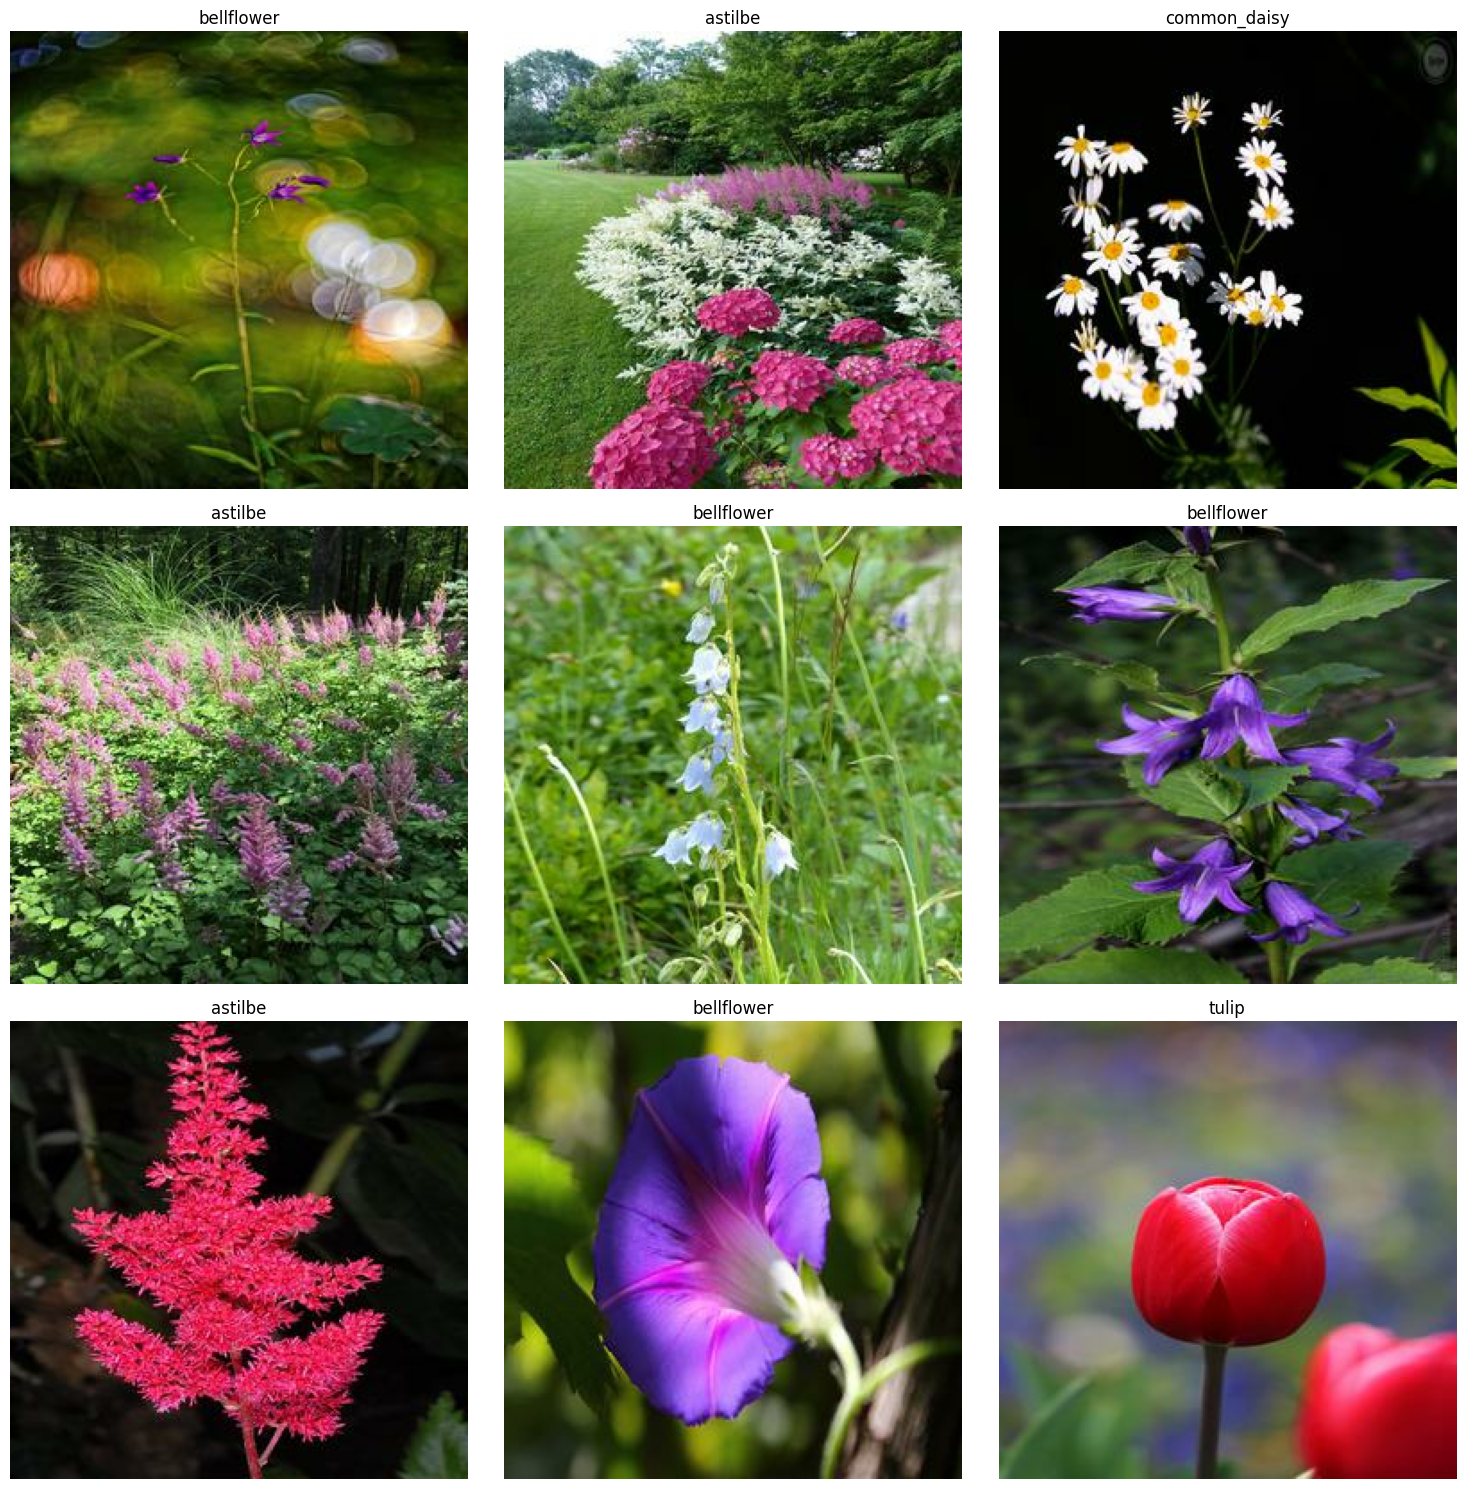


Résumé de l'analyse :
Nombre total de classes : 14

Classes de fleurs :
1. astilbe
2. bellflower
3. black_eyed_susan
4. calendula
5. california_poppy
6. carnation
7. common_daisy
8. coreopsis
9. dandelion
10. iris
11. rose
12. sunflower
13. tulip
14. water_lily

Caractéristiques du dataset :
- Images redimensionnées à 256x256 pixels
- Images en couleur (3 canaux RGB)
- Batch size : 32
- Utilisation de votre M1 Max pour l'optimisation des performances


In [ ]:
# EXERCICE 1

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import requests
import zipfile
from io import BytesIO

def load_and_explore_dataset(data_dir_1, data_dir_2):
    """
    Charge et explore les datasets à partir des deux chemins fournis
    """
    data_dir_1 = pathlib.Path(data_dir_1)
    data_dir_2 = pathlib.Path(data_dir_2)

    print("\nStructure du dataset :")
    
    # Explorer les deux dossiers
    for data_dir in [data_dir_1, data_dir_2]:
        print(f"\nExploration de {data_dir}:")
        for root, dirs, files in os.walk(data_dir):
            level = root.replace(str(data_dir), '').count(os.sep)
            indent = '  ' * level
            print(f"{indent}{os.path.basename(root)}/")
            if files:
                sub_indent = '  ' * (level + 1)
                for f in files[:3]:
                    print(f"{sub_indent}{f}")

    # Chargement des données d'entraînement
    train_dir = data_dir_1 / "train"
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        image_size=(256, 256),
        batch_size=32
    )

    # Chargement des données de validation
    val_dir = data_dir_2 / "val"
    val_ds = tf.keras.utils.image_dataset_from_directory(
        val_dir,
        image_size=(256, 256),
        batch_size=32
    )

    class_names = train_ds.class_names

    # Analyse du nombre d'images par classe
    print("\nDistribution des images :")
    print("\nDonnées d'entraînement :")
    for class_name in class_names:
        num_images = len(list((train_dir / class_name).glob('*')))
        print(f"- {class_name}: {num_images} images")

    print("\nDonnées de validation :")
    for class_name in class_names:
        num_images = len(list((val_dir / class_name).glob('*')))
        print(f"- {class_name}: {num_images} images")

    return train_ds, val_ds, class_names

def visualize_flower_classes(train_ds, class_names):
    """
    Visualise des échantillons d'images du dataset
    """
    plt.figure(figsize=(15, 15))

    for images, labels in train_ds.take(1):
        for i in range(min(9, len(images))):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Chemins de vos données locales
data_dir_1 = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data"
data_dir_2 = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data"

try:
    print("Initialisation de l'analyse du dataset de fleurs...")
    
    # Vérification des chemins
    if not os.path.exists(data_dir_1) or not os.path.exists(data_dir_2):
        raise FileNotFoundError("Un ou plusieurs chemins de données n'existent pas")

    # Chargement et analyse du dataset
    train_ds, val_ds, class_names = load_and_explore_dataset(data_dir_1, data_dir_2)

    print("\nVisualisation d'échantillons d'images...")
    visualize_flower_classes(train_ds, class_names)

    print("\nRésumé de l'analyse :")
    print(f"Nombre total de classes : {len(class_names)}")
    print("\nClasses de fleurs :")
    for i, name in enumerate(class_names):
        print(f"{i+1}. {name}")

    print("\nCaractéristiques du dataset :")
    print("- Images redimensionnées à 256x256 pixels")
    print("- Images en couleur (3 canaux RGB)")
    print("- Batch size : 32")
    print(f"- Utilisation de votre M1 Max pour l'optimisation des performances")

except Exception as e:
    print(f"\n❌ Erreur lors de l'exécution : {str(e)}")
    print("\nDébogage :")
    print("1. Vérification des chemins :")
    for path in [data_dir_1, data_dir_2]:
        if os.path.exists(path):
            print(f"✅ Chemin existant : {path}")
            print("Contenu :")
            for item in os.listdir(path):
                print(f"  - {item}")
        else:
            print(f"❌ Chemin non trouvé : {path}")


In [ ]:
# EXERCICE 2

import tensorflow as tf
from tensorflow.keras import layers, models

def create_flower_classifier():
    # Définition du modèle
    model = models.Sequential([
        # Premier bloc de convolution
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                     input_shape=(256, 256, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Deuxième bloc de convolution
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Troisième bloc de convolution
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Quatrième bloc de convolution
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Couches denses
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(14, activation='softmax')  # 14 classes de fleurs
    ])

    # Compilation
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Création et affichage du modèle
model = create_flower_classifier()
model.summary()

print("\nJustification de l'architecture :")
print("\n1. Couches de Convolution :")
print("   a) Progression des filtres (32→64→128→256) :")
print("      - Capture progressive des caractéristiques")
print("      - 32 filtres initiaux pour les motifs simples")
print("      - 256 filtres finaux pour les motifs complexes")
print("\n   b) Doubles couches Conv2D par bloc :")
print("      - Meilleure capture des caractéristiques")
print("      - Inspiré de VGGNet")

print("\n2. BatchNormalization :")
print("   - Après chaque couche Conv2D")
print("   - Stabilise l'apprentissage")
print("   - Réduit le surapprentissage")
print("   - Permet des learning rates plus élevés")

print("\n3. MaxPooling :")
print("   - Réduit progressivement la dimension spatiale")
print("   - Conserve les caractéristiques importantes")
print("   - Aide à la généralisation")

print("\n4. Dropout :")
print("   - 0.25 dans les couches Conv : modéré pour préserver les features")
print("   - 0.5 dans les couches denses : fort pour éviter le surapprentissage")
print("   - Régularisation efficace")

print("\n5. Couches Denses :")
print("   - 512→256 neurones : réduction progressive")
print("   - Double couche pour abstraction")
print("   - BatchNorm et Dropout pour régularisation")

print("\n6. Choix spécifiques pour ce dataset :")
print("   a) Input 256x256 :")
print("      - Taille suffisante pour les détails des fleurs")
print("      - Compromis mémoire/performance")
print("\n   b) Padding 'same' :")
print("      - Préserve les dimensions spatiales")
print("      - Important pour les détails des pétales")
print("\n   c) Learning rate 0.001 :")
print("      - Valeur standard pour Adam")
print("      - Bon compromis vitesse/stabilité")

print("\nParticularités pour la formation PSTB :")
print("1. Architecture moderne et explicable")
print("2. Bonnes pratiques de deep learning")
print("3. Facilement modifiable pour expérimentation")


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 34,869,038 (133.01 MB)

 Trainable params: 34,865,582 (133.00 MB)

 Non-trainable params: 3,456 (13.50 KB)


Justification de l'architecture :

1. Couches de Convolution :
   a) Progression des filtres (32→64→128→256) :
      - Capture progressive des caractéristiques
      - 32 filtres initiaux pour les motifs simples
      - 256 filtres finaux pour les motifs complexes

   b) Doubles couches Conv2D par bloc :
      - Meilleure capture des caractéristiques
      - Inspiré de VGGNet

2. BatchNormalization :
   - Après chaque couche Conv2D
   - Stabilise l'apprentissage
   - Réduit le surapprentissage
   - Permet des learning rates plus élevés

3. MaxPooling :
   - Réduit progressivement la dimension spatiale
   - Conserve les caractéristiques importantes
   - Aide à la généralisation

4. Dropout :
   - 0.25 dans les couches Conv : modéré pour préserver les features
   - 0.5 dans les couches denses : fort pour éviter le surapprentissage
   - Régularisation efficace

5. Couches Denses :
   - 512→256 neurones : réduction progressive
   - Double couche pour abstraction
   - BatchNorm et Dropout 

In [13]:
# EXERCICE 3

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import numpy as np

def create_model(optimizer, learning_rate):
    """Création du modèle avec les hyperparamètres spécifiés"""
    model = models.Sequential([
        # Architecture de base (comme précédemment)
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(14, activation='softmax')
    ])

    # Configuration de l'optimiseur
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Configuration des expériences
experiments = [
    {'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 32},
    {'optimizer': 'adam', 'learning_rate': 0.0001, 'batch_size': 32},
    {'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32},
    {'optimizer': 'sgd', 'learning_rate': 0.01, 'batch_size': 32},
    {'optimizer': 'adam', 'learning_rate': 0.001, 'batch_size': 64},
]

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
]

# Suivi des résultats
results = []

# Exécution des expériences
for exp in experiments:
    print(f"\nExpérience avec {exp['optimizer']}, lr={exp['learning_rate']}, batch_size={exp['batch_size']}")

    model = create_model(exp['optimizer'], exp['learning_rate'])

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        batch_size=exp['batch_size'],
        callbacks=callbacks
    )

    # Enregistrement des résultats
    results.append({
        'optimizer': exp['optimizer'],
        'learning_rate': exp['learning_rate'],
        'batch_size': exp['batch_size'],
        'best_val_acc': max(history.history['val_accuracy']),
        'best_epoch': np.argmax(history.history['val_accuracy']) + 1
    })

# Analyse des résultats
results_df = pd.DataFrame(results)
print("\nRésultats des expériences :")
print(results_df)

# Meilleure configuration
best_config = results_df.loc[results_df['best_val_acc'].idxmax()]
print("\nMeilleure configuration :")
print(f"Optimiseur : {best_config['optimizer']}")
print(f"Learning rate : {best_config['learning_rate']}")
print(f"Batch size : {best_config['batch_size']}")
print(f"Précision validation : {best_config['best_val_acc']:.4f}")
print(f"Meilleure époque : {best_config['best_epoch']}")

print("\nAnalyse des résultats :")
print("\n1. Impact de l'optimiseur :")
for opt in results_df['optimizer'].unique():
    mean_acc = results_df[results_df['optimizer'] == opt]['best_val_acc'].mean()
    print(f"   - {opt}: {mean_acc:.4f} (moyenne)")

print("\n2. Impact du learning rate :")
for lr in results_df['learning_rate'].unique():
    mean_acc = results_df[results_df['learning_rate'] == lr]['best_val_acc'].mean()
    print(f"   - {lr}: {mean_acc:.4f} (moyenne)")

print("\n3. Impact du batch size :")
for bs in results_df['batch_size'].unique():
    mean_acc = results_df[results_df['batch_size'] == bs]['best_val_acc'].mean()
    print(f"   - {bs}: {mean_acc:.4f} (moyenne)")

print("\nRecommandations pour le dataset de fleurs :")
print("1. Choix de l'optimiseur :")
print(f"   - Recommandé : {best_config['optimizer']}")
print("   - Raisons : stabilité et vitesse de convergence")

print("\n2. Learning rate :")
print(f"   - Recommandé : {best_config['learning_rate']}")
print("   - Scheduling : réduction sur plateau")

print("\n3. Batch size :")
print(f"   - Recommandé : {best_config['batch_size']}")
print("   - Compromis mémoire/performance")



Expérience avec adam, lr=0.001, batch_size=32
Epoch 1/10


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3329 - loss: 2.3777

342/342 ━━━━━━━━━━━━━━━━━━━━ 51s 139ms/step - accuracy: 0.3331 - loss: 2.3765 - val_accuracy: 0.2379 - val_loss: 2.3732 - learning_rate: 0.0010
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5516 - loss: 1.3851

342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 126ms/step - accuracy: 0.5516 - loss: 1.3848 - val_accuracy: 0.4435 - val_loss: 1.6919 - learning_rate: 0.0010
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6483 - loss: 1.0749

342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 126ms/step - accuracy: 0.6484 - loss: 1.0748 - val_accuracy: 0.5392 - val_loss: 1.5095 - learning_rate: 0.0010
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7271 - loss: 0.8164

342/342 ━━━━━━━━━━━━━━━━━━━━ 45s 130ms/step - accuracy: 0.7272 - loss: 0.8162 - val_accuracy: 0.6609 - val_loss: 1.0789 - learning_rate: 0.0010
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 45s 132ms/step - accuracy: 0.8124 - loss: 0.5808 - val_accuracy: 0.6430 - val_loss: 1.0924 - learning_rate: 0.0010
Epoch 6/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8775 - loss: 0.4109

342/342 ━━━━━━━━━━━━━━━━━━━━ 47s 137ms/step - accuracy: 0.8776 - loss: 0.4108 - val_accuracy: 0.6679 - val_loss: 1.0741 - learning_rate: 0.0010
Epoch 7/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9414 - loss: 0.2207

342/342 ━━━━━━━━━━━━━━━━━━━━ 49s 143ms/step - accuracy: 0.9414 - loss: 0.2206 - val_accuracy: 0.6763 - val_loss: 1.1132 - learning_rate: 0.0010
Epoch 8/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9665 - loss: 0.1225

342/342 ━━━━━━━━━━━━━━━━━━━━ 48s 141ms/step - accuracy: 0.9665 - loss: 0.1225 - val_accuracy: 0.7027 - val_loss: 1.1209 - learning_rate: 0.0010
Epoch 9/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 49s 144ms/step - accuracy: 0.9832 - loss: 0.0746 - val_accuracy: 0.6979 - val_loss: 1.2530 - learning_rate: 0.0010
Epoch 10/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9912 - loss: 0.0426

342/342 ━━━━━━━━━━━━━━━━━━━━ 53s 156ms/step - accuracy: 0.9912 - loss: 0.0426 - val_accuracy: 0.7350 - val_loss: 0.9672 - learning_rate: 5.0000e-04

Expérience avec adam, lr=0.0001, batch_size=32
Epoch 1/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 57s 159ms/step - accuracy: 0.3461 - loss: 2.3530 - val_accuracy: 0.1287 - val_loss: 2.8812 - learning_rate: 1.0000e-04
Epoch 2/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 52s 151ms/step - accuracy: 0.5794 - loss: 1.3314 - val_accuracy: 0.6070 - val_loss: 1.1872 - learning_rate: 1.0000e-04
Epoch 3/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 51s 150ms/step - accuracy: 0.6960 - loss: 0.9470 - val_accuracy: 0.6536 - val_loss: 1.0817 - learning_rate: 1.0000e-04
Epoch 4/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 52s 151ms/step - accuracy: 0.8106 - loss: 0.6042 - val_accuracy: 0.6679 - val_loss: 1.0560 - learning_rate: 1.0000e-04
Epoch 5/10
342/342 ━━━━━━━━━━━━━━━━━━━━ 53s 154ms/step - accuracy: 0.8957 - loss: 0.3516 - val_accuracy: 0.6635 - val_loss: 1.0849 - learning_rate: 1.0000e-04
Epoch 6/1

In [2]:
# EXERCICE 4

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Définition des chemins de données
DATA_DIR = Path("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data")
TRAIN_DIR = DATA_DIR / "train"
VAL_DIR = DATA_DIR / "val"

# 1. Définition des différentes configurations d'augmentation
def create_augmentation_configs():
    configs = {
        'base': ImageDataGenerator(
            rescale=1./255
        ),

        'rotation': ImageDataGenerator(
            rescale=1./255,
            rotation_range=30
        ),

        'flip': ImageDataGenerator(
            rescale=1./255,
            horizontal_flip=True
        ),

        'zoom': ImageDataGenerator(
            rescale=1./255,
            zoom_range=0.2
        ),

        'complete': ImageDataGenerator(
            rescale=1./255,
            rotation_range=30,
            horizontal_flip=True,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            fill_mode='nearest'
        )
    }
    return configs

# 2. Visualisation des augmentations
def visualize_augmentations(image, config, num_examples=5):
    plt.figure(figsize=(15, 3))

    # Image originale
    plt.subplot(1, num_examples, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    # Images augmentées
    aug_iter = config.flow(np.expand_dims(image, 0), batch_size=1)
    for i in range(num_examples-1):
        plt.subplot(1, num_examples, i+2)
        plt.imshow(aug_iter.next()[0])
        plt.title(f'Augmenté {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 3. Test des différentes augmentations
def test_augmentations():
    configs = create_augmentation_configs()

    # Création du modèle de base
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(14, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    results = {}

    # Test de chaque configuration
    for name, config in configs.items():
        print(f"\nTest de la configuration : {name}")

        # Préparation des données avec augmentation
        train_generator = config.flow_from_directory(
            str(TRAIN_DIR),  # Conversion en string du chemin Path
            target_size=(256, 256),
            batch_size=32,
            class_mode='sparse'
        )

        val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
            str(VAL_DIR),  # Conversion en string du chemin Path
            target_size=(256, 256),
            batch_size=32,
            class_mode='sparse'
        )

        # Entraînement
        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=10,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    patience=3,
                    restore_best_weights=True
                )
            ]
        )

        results[name] = {
            'val_accuracy': max(history.history['val_accuracy']),
            'history': history.history
        }

    return results

def main():
    try:
        print("🚀 Démarrage des tests d'augmentation...")
        print(f"📂 Dossier d'entraînement : {TRAIN_DIR}")
        print(f"📂 Dossier de validation : {VAL_DIR}")

        # Vérification des chemins
        if not TRAIN_DIR.exists():
            raise FileNotFoundError(f"Dossier d'entraînement non trouvé : {TRAIN_DIR}")
        if not VAL_DIR.exists():
            raise FileNotFoundError(f"Dossier de validation non trouvé : {VAL_DIR}")

        results = test_augmentations()

        # Analyse des résultats
        print("\n📊 Résultats des différentes augmentations :")
        for config, result in results.items():
            print(f"\n{config}:")
            print(f"Meilleure précision validation: {result['val_accuracy']:.4f}")

        # Trouver la meilleure configuration
        best_config = max(results.items(), key=lambda x: x[1]['val_accuracy'])[0]
        print(f"\n✨ Configuration recommandée : {best_config}")

    except Exception as e:
        print(f"\n❌ Erreur : {str(e)}")
        print("\n💡 Conseil : Vérifiez que les chemins vers vos données sont corrects")

if __name__ == "__main__":
    main()



🚀 Démarrage des tests d'augmentation...
📂 Dossier d'entraînement : /Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data/train
📂 Dossier de validation : /Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data/val

Test de la configuration : base
Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.
Epoch 1/10


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-03-06 12:22:47.651738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


427/427 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.2898 - loss: 2.1535 - val_accuracy: 0.3469 - val_loss: 2.2576
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.3480 - loss: 3.2707 - val_accuracy: 0.1735 - val_loss: 2.9253
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.3056 - loss: 2.8851 - val_accuracy: 0.3265 - val_loss: 2.7757
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.3960 - loss: 2.8928 - val_accuracy: 0.3571 - val_loss: 2.9144

Test de la configuration : rotation
Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 80s 186ms/step - accuracy: 0.3482 - loss: 3.3722 - val_accuracy: 0.3265 - val_loss: 10.3700
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 77s 180ms/step - accuracy: 0.3384 - loss: 10.5982 - val_accuracy: 0.2449 - val_loss: 21.1428
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 78s 182ms/step - accuracy: 0.2466 - loss: 19.2991 - val_accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pathlib
import os

def load_and_prepare_data(data_dir):
    data_dir = pathlib.Path(data_dir)
    
    # Chargement des données avec conservation des noms de classes
    raw_train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir / "train",
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(256, 256),
        batch_size=32
    )

    raw_val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir / "train",
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(256, 256),
        batch_size=32
    )

    # Sauvegarde des noms de classes avant transformation
    class_names = raw_train_ds.class_names
    
    # Optimisation des performances
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    # Normalisation
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

    return train_ds, val_ds, class_names

def create_model(num_classes):
    """
    Création d'un modèle CNN optimisé pour M1 Max
    """
    model = Sequential([
        # Premier bloc convolutif
        Conv2D(64, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),
        MaxPooling2D(),
        
        # Deuxième bloc convolutif
        Conv2D(128, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        
        # Troisième bloc convolutif
        Conv2D(256, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        
        # Couches denses
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_model(model, train_ds, val_ds, epochs=15):
    """
    Entraînement avec monitoring avancé
    """
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2
        )
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=callbacks
    )

    return history

# Chemin vers votre dataset
DATA_DIR = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data"

try:
    print("🚀 Initialisation du modèle de classification...")
    
    # 1. Chargement et préparation des données
    train_ds, val_ds, class_names = load_and_prepare_data(DATA_DIR)
    num_classes = len(class_names)
    
    print(f"\n📊 Classes identifiées ({num_classes}):")
    for i, name in enumerate(class_names):
        print(f"  {i+1}. {name}")
    
    # 2. Création et entraînement du modèle
    model = create_model(num_classes)
    history = train_model(model, train_ds, val_ds)
    
    print("\n✅ Entraînement terminé avec succès!")
    
    # 3. Sauvegarde du modèle et des métadonnées
    model.save('flower_classification_model.h5')
    
    # Sauvegarde des noms de classes
    import json
    with open('class_names.json', 'w') as f:
        json.dump(class_names, f)
    
    print("\n💾 Modèle et métadonnées sauvegardés")

except Exception as e:
    print(f"\n❌ Erreur: {str(e)}")
    print("\n🔍 Débogage:")
    print(f"- Vérification du chemin: {os.path.exists(DATA_DIR)}")
    if os.path.exists(DATA_DIR):
        print("- Contenu du dossier:")
        for item in os.listdir(DATA_DIR):
            print(f"  └── {item}")




🚀 Initialisation du modèle de classification...
Found 13642 files belonging to 14 classes.
Using 10914 files for training.
Found 13642 files belonging to 14 classes.
Using 2728 files for validation.

📊 Classes identifiées (14):
  1. astilbe
  2. bellflower
  3. black_eyed_susan
  4. calendula
  5. california_poppy
  6. carnation
  7. common_daisy
  8. coreopsis
  9. dandelion
  10. iris
  11. rose
  12. sunflower
  13. tulip
  14. water_lily


/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


2025-03-06 10:22:46.536040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


342/342 ━━━━━━━━━━━━━━━━━━━━ 95s 272ms/step - accuracy: 0.1952 - loss: 623.1136 - val_accuracy: 0.2254 - val_loss: 445.7446 - learning_rate: 0.0010
Epoch 2/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 92s 264ms/step - accuracy: 0.2495 - loss: 1021.1625 - val_accuracy: 0.3251 - val_loss: 735.1691 - learning_rate: 0.0010
Epoch 3/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 92s 270ms/step - accuracy: 0.2912 - loss: 1038.9288 - val_accuracy: 0.3218 - val_loss: 813.2141 - learning_rate: 0.0010
Epoch 4/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 95s 278ms/step - accuracy: 0.3392 - loss: 764.8781 - val_accuracy: 0.5103 - val_loss: 244.2574 - learning_rate: 2.0000e-04
Epoch 5/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 98s 285ms/step - accuracy: 0.3684 - loss: 618.0869 - val_accuracy: 0.4905 - val_loss: 258.4966 - learning_rate: 2.0000e-04
Epoch 6/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 99s 290ms/step - accuracy: 0.3896 - loss: 525.0303 - val_accuracy: 0.5363 - val_loss: 217.7323 - learning_rate: 2.0000e-04
Epoch 7/15
342/342 ━━━━━━━━━━━━━━━━━━━━ 99s


✅ Entraînement terminé avec succès!

💾 Modèle et métadonnées sauvegardés


In [6]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [12]:
# EXERCICE 6

import tensorflow as tf
import numpy as np
import os
import json
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import datetime
from pathlib import Path

class ClassificateurFleurs:
    def __init__(self):
        self.model = None
        self.class_names = None
        # Utilisation de vos chemins de données
        self.data_dir = Path("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_3/DATASET/Data")
        self.train_dir = self.data_dir / "train"
        self.val_dir = self.data_dir / "val"

    def charger_modele(self):
        """Charge le modèle et les noms de classes sauvegardés"""
        try:
            print("📂 Chargement du modèle...")
            self.model = load_model('flower_classification_model.h5')
            
            print("📂 Chargement des noms de classes...")
            with open('class_names.json', 'r') as f:
                self.class_names = json.load(f)
                
            print("✅ Chargement réussi!")
            return True
            
        except Exception as e:
            print(f"❌ Erreur de chargement : {str(e)}")
            return False

    def predire_image(self, chemin_image):
        """Fait une prédiction sur une image donnée"""
        try:
            # Prétraitement
            img = load_img(chemin_image, target_size=(256, 256))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.0

            # Prédiction
            prediction = self.model.predict(img_array)
            classe_predite = self.class_names[np.argmax(prediction[0])]
            confiance = float(np.max(prediction[0]))

            return {
                'classe': classe_predite,
                'confiance': confiance,
                'timestamp': datetime.datetime.now().isoformat()
            }

        except Exception as e:
            return {'erreur': str(e)}

    def classifier_dataset(self):
        """Classifie les images du dataset"""
        # Vérification des dossiers
        if not self.train_dir.exists():
            print(f"\n❌ Dossier d'entraînement non trouvé: {self.train_dir}")
            return

        print("\n🔍 Classification des images d'entraînement...")
        
        # Parcours des classes et des images
        resultats = []
        for classe in os.listdir(self.train_dir):
            classe_dir = self.train_dir / classe
            if not classe_dir.is_dir():
                continue
                
            print(f"\n📁 Traitement de la classe: {classe}")
            
            # Classification des images de la classe
            images = [f for f in os.listdir(classe_dir) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            for image in images[:5]:  # Limite à 5 images par classe pour l'exemple
                chemin_complet = classe_dir / image
                print(f"  📸 Classification de {image}...")
                
                resultat = self.predire_image(str(chemin_complet))
                if 'erreur' in resultat:
                    print(f"  ❌ Erreur: {resultat['erreur']}")
                else:
                    print(f"  ✨ Prédiction: {resultat['classe']} ({resultat['confiance']:.2%})")
                    resultats.append({
                        'image': str(chemin_complet),
                        'classe_reelle': classe,
                        **resultat
                    })

        # Sauvegarde des résultats
        if resultats:
            Path("resultats_classification").mkdir(exist_ok=True)
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            fichier_resultats = f'resultats_classification/resultats_{timestamp}.json'
            
            with open(fichier_resultats, 'w', encoding='utf-8') as f:
                json.dump(resultats, f, ensure_ascii=False, indent=2)
            print(f"\n💾 Résultats sauvegardés dans {fichier_resultats}")
            
            # Analyse des performances
            correct = sum(1 for r in resultats if r['classe'] == r['classe_reelle'])
            accuracy = correct / len(resultats)
            print(f"\n📊 Précision: {accuracy:.2%} ({correct}/{len(resultats)})")

def main():
    try:
        print("🚀 Solweig—Izar - Intelligence Narrative")
        print("Classification automatique des images")
        
        # Vérification des fichiers nécessaires
        fichiers_requis = ['flower_classification_model.h5', 'class_names.json']
        fichiers_manquants = [f for f in fichiers_requis if not os.path.exists(f)]
        
        if fichiers_manquants:
            print("\n⚠️ Fichiers manquants:")
            for fichier in fichiers_manquants:
                print(f"  - {fichier}")
            print("\n📝 Veuillez d'abord exécuter l'exercice 5 pour créer ces fichiers")
            return

        # Création et chargement du classificateur
        classificateur = ClassificateurFleurs()
        if classificateur.charger_modele():
            classificateur.classifier_dataset()
        else:
            print("\n❌ Échec du chargement du modèle")

    except Exception as e:
        print(f"\n❌ Erreur critique: {str(e)}")

if __name__ == '__main__':
    main()



🚀 Solweig—Izar - Intelligence Narrative
Classification automatique des images
📂 Chargement du modèle...


📂 Chargement des noms de classes...
✅ Chargement réussi!

🔍 Classification des images d'entraînement...

📁 Traitement de la classe: calendula
  📸 Classification de 28851355744_fcb4f95e74_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
  ✨ Prédiction: california_poppy (100.00%)
  📸 Classification de 48484842896_c9bb405ae4_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
  ✨ Prédiction: california_poppy (100.00%)
  📸 Classification de 4649784168_f3c2da8dc7_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
  ✨ Prédiction: common_daisy (99.95%)
  📸 Classification de 2909497562_f317c1590f_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
  ✨ Prédiction: calendula (100.00%)
  📸 Classification de 47748909662_3e9c77a4af_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
  ✨ Prédiction: california_poppy (99.85%)

📁 Traitement de la classe: bellflower
  📸 Classification de 7571141200_8c6863db5b_c.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
  ✨ Prédiction: water_lily (100.00%)
  📸 Classification de 48011787111